In [1184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
%matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans thonny


In [1185]:

csv_file1 = r"Y:\Documents\temp16122022.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [1186]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,-2.11
1,-1.33
2,-0.07
3,0.36
4,0.39
...,...
12247,20.59
12248,20.66
12249,19.88
12250,20.13


In [1187]:
date_time_str = '16/12/22 9:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2022, 12, 16, 9, 0)

In [1188]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2022, 12, 16, 9, 0), datetime.datetime(2024, 5, 9, 21, 0))

In [1189]:
len(data)

12252

In [1190]:
def mk_date(date_time_str,data):
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))

In [1191]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19342.375     , 19342.41666667, 19342.45833333, ...,
       19852.75      , 19852.79166667, 19852.83333333])

In [1192]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [1193]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [1194]:
data[['dates','temp']]

,dates,temp
0,16/12/22 09:00:00,-2.11
1,16/12/22 10:00:00,-1.33
2,16/12/22 11:00:00,-0.07
3,16/12/22 12:00:00,0.36
4,16/12/22 13:00:00,0.39
...,...,...
12247,09/05/24 16:00:00,20.59
12248,09/05/24 17:00:00,20.66
12249,09/05/24 18:00:00,19.88
12250,09/05/24 19:00:00,20.13


In [1195]:
import warnings
warnings.filterwarnings("ignore")


In [1196]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(        temp         hours              dates
 0      -2.11  19342.375000  16/12/22 09:00:00
 1      -1.33  19342.416667  16/12/22 10:00:00
 2      -0.07  19342.458333  16/12/22 11:00:00
 3       0.36  19342.500000  16/12/22 12:00:00
 4       0.39  19342.541667  16/12/22 13:00:00
 ...      ...           ...                ...
 12247  20.59  19852.666667  09/05/24 16:00:00
 12248  20.66  19852.708333  09/05/24 17:00:00
 12249  19.88  19852.750000  09/05/24 18:00:00
 12250  20.13  19852.791667  09/05/24 19:00:00
 12251  18.97  19852.833333  09/05/24 20:00:00
 
 [12252 rows x 3 columns],
 12252)

In [1197]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [1198]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

-0.9458333333333133

In [1199]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

12228

In [1200]:
len(x)

12228

In [1201]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

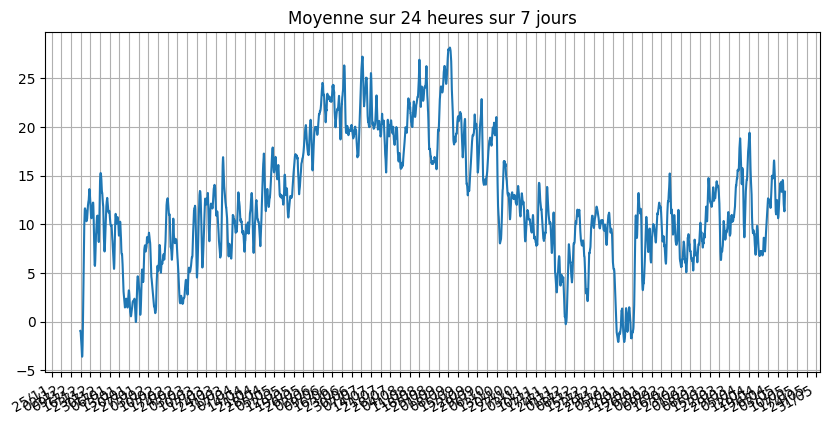

In [1202]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [1203]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=510, seconds=44471, microseconds=99645)

In [1204]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [1205]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2022, 12, 16, 9, 0),
 datetime.datetime(2024, 5, 9, 21, 21, 11, 99645),
 510)

In [1206]:
moyenne = data['temp'].mean()
moyenne

12.254328272932606

12.254328272932606

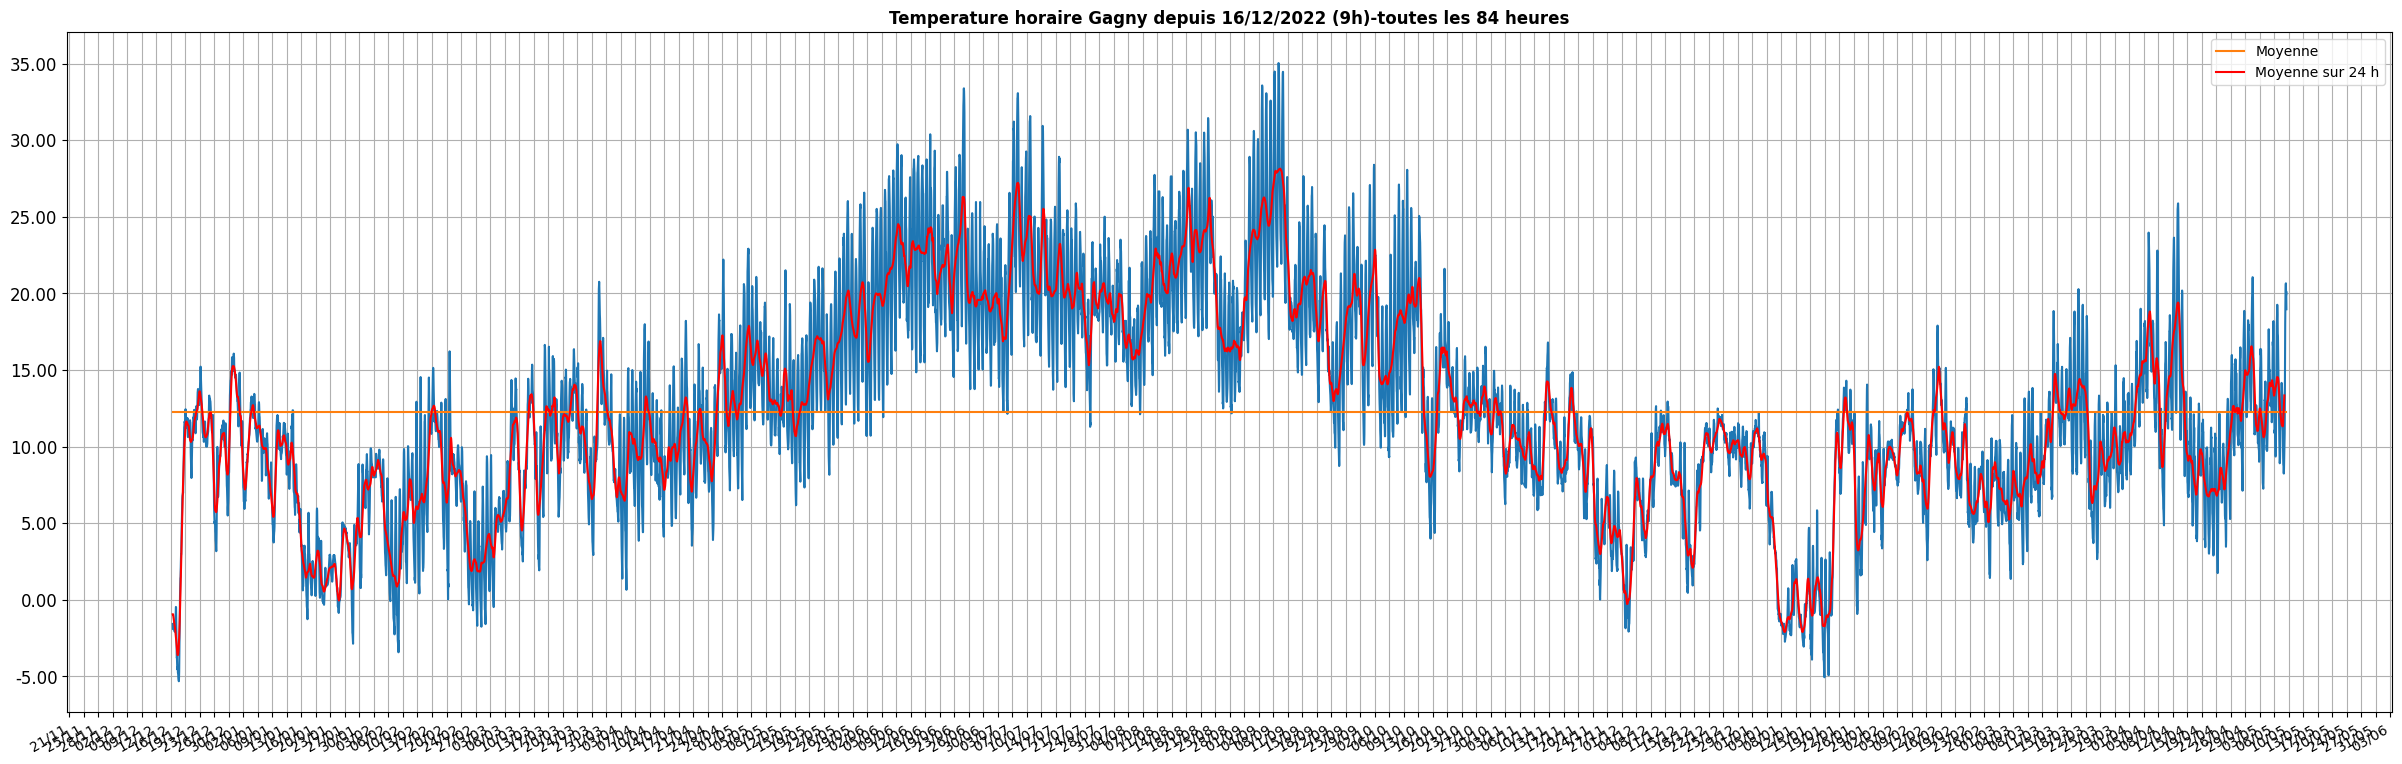

In [1207]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [1208]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,-2.11,19342.375000,16/12/22 09:00:00,NaN
1,-1.33,19342.416667,16/12/22 10:00:00,0.78
2,-0.07,19342.458333,16/12/22 11:00:00,1.26
3,0.36,19342.500000,16/12/22 12:00:00,0.43
4,0.39,19342.541667,16/12/22 13:00:00,0.03
...,...,...,...,...
12247,20.59,19852.666667,09/05/24 16:00:00,0.38
12248,20.66,19852.708333,09/05/24 17:00:00,0.07
12249,19.88,19852.750000,09/05/24 18:00:00,-0.78
12250,20.13,19852.791667,09/05/24 19:00:00,0.25


<Axes: >

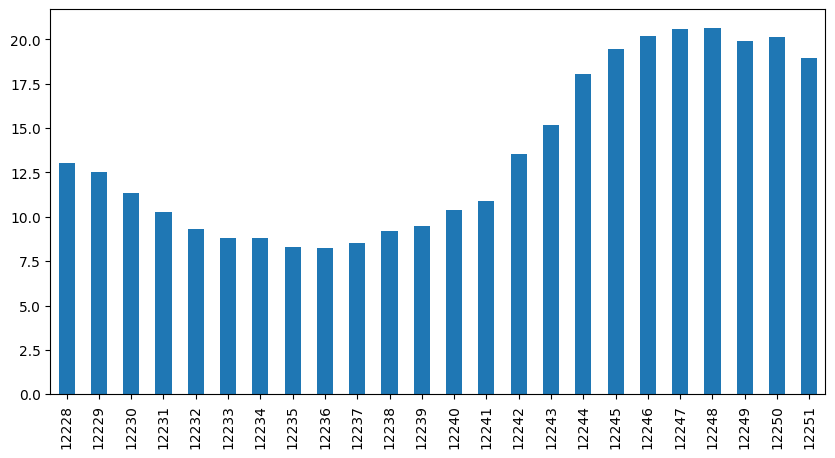

In [1209]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

<Axes: ylabel='Density'>

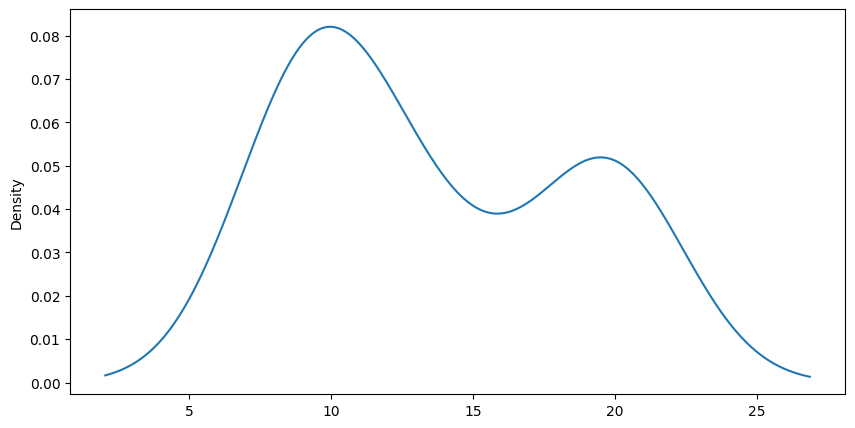

In [1210]:
data.tail(24)['temp'].plot.kde(figsize=(10,5))

<Axes: ylabel='Frequency'>

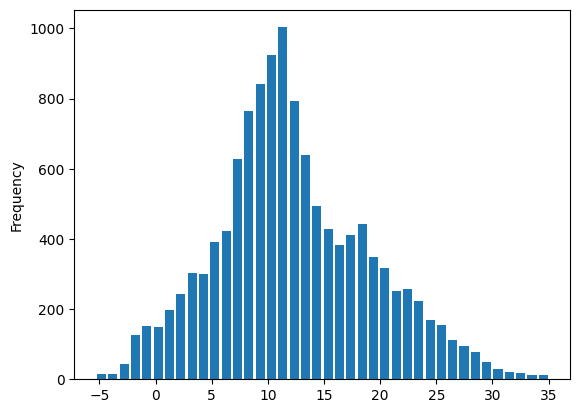

In [1211]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

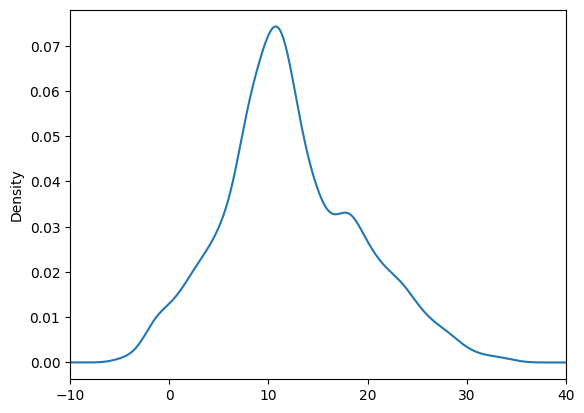

In [1212]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

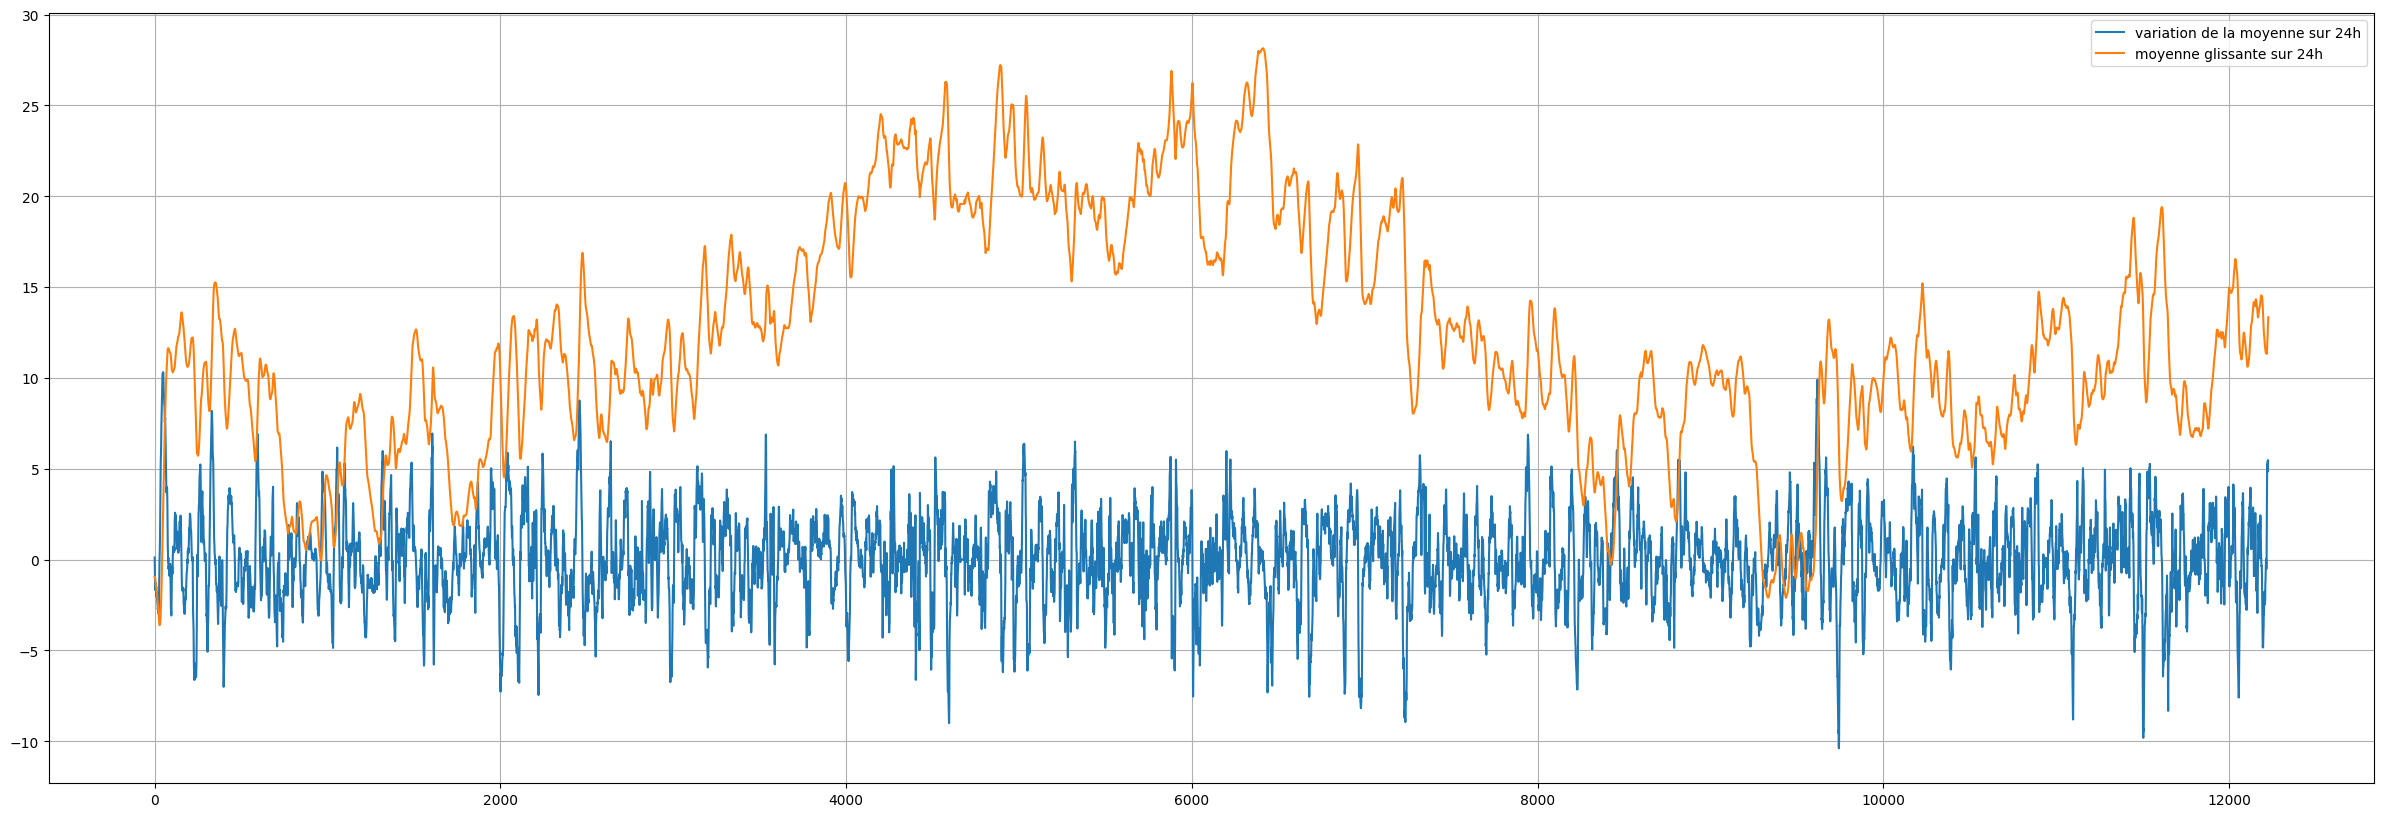

In [1213]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [1214]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [1215]:
window, days, interval

(24, 15, 12)

In [1216]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [1217]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

12.739250000000023

In [1218]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, 12.739250000000023)

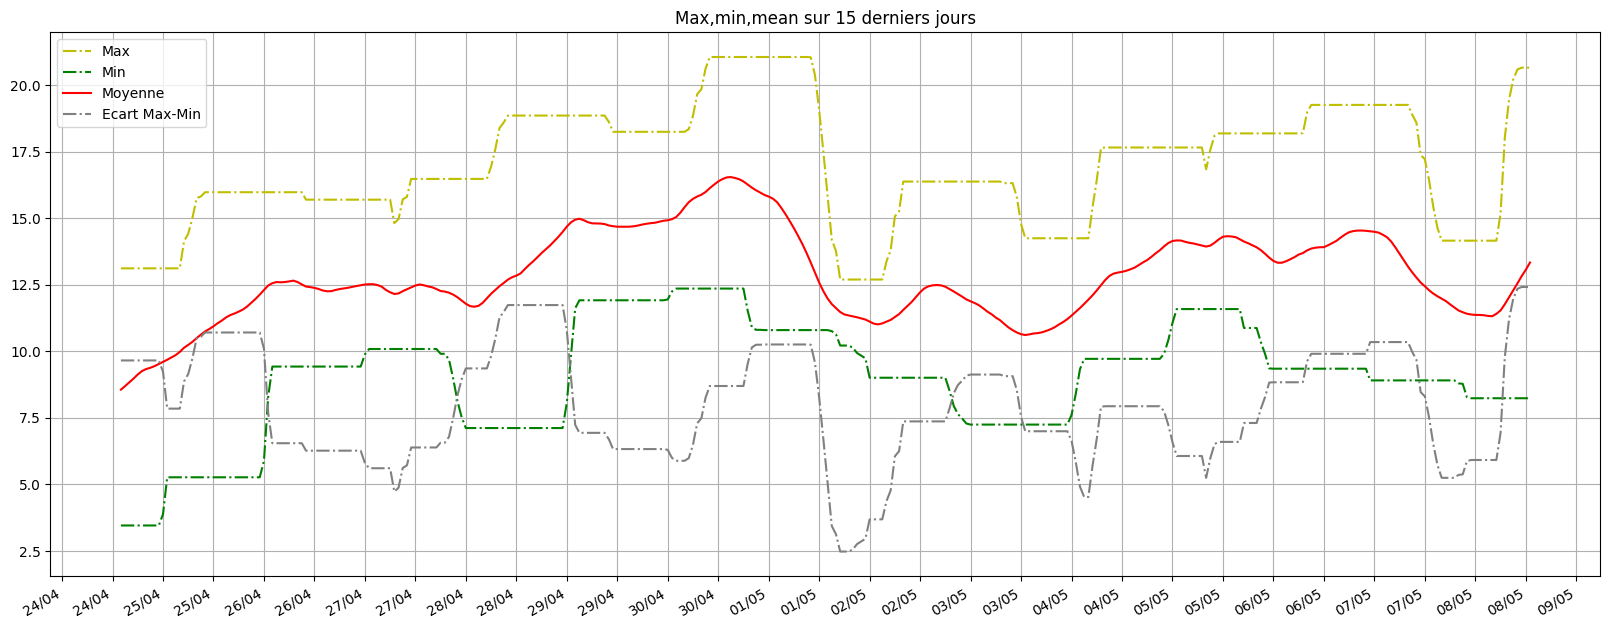

In [1219]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [1220]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

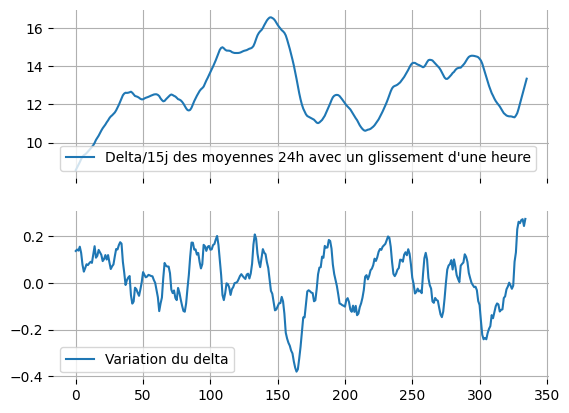

In [1221]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [1222]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [1223]:
# graphical output...
from pylab import sign, diff


In [1224]:
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


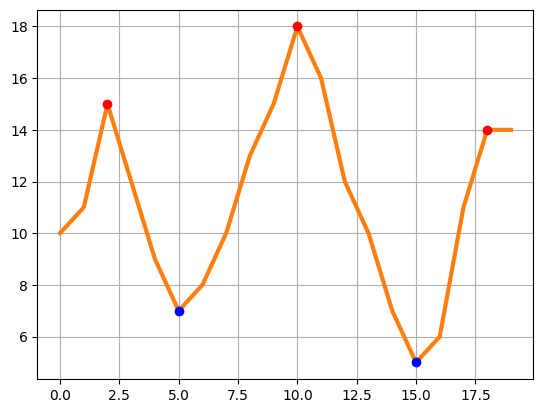

In [1225]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [1226]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data.tail(24*jours)[['heures','temp','variation']]

,heures,temp,variation
12084,21,10.76,-0.16
12085,22,10.64,-0.12
12086,23,10.22,-0.42
12087,00,10.39,0.17
12088,01,10.64,0.25
...,...,...,...
12247,16,20.59,0.38
12248,17,20.66,0.07
12249,18,19.88,-0.78
12250,19,20.13,0.25


In [1227]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [1228]:
_max - _min

13.41

## Main graph

(12.739250000000023, 15)

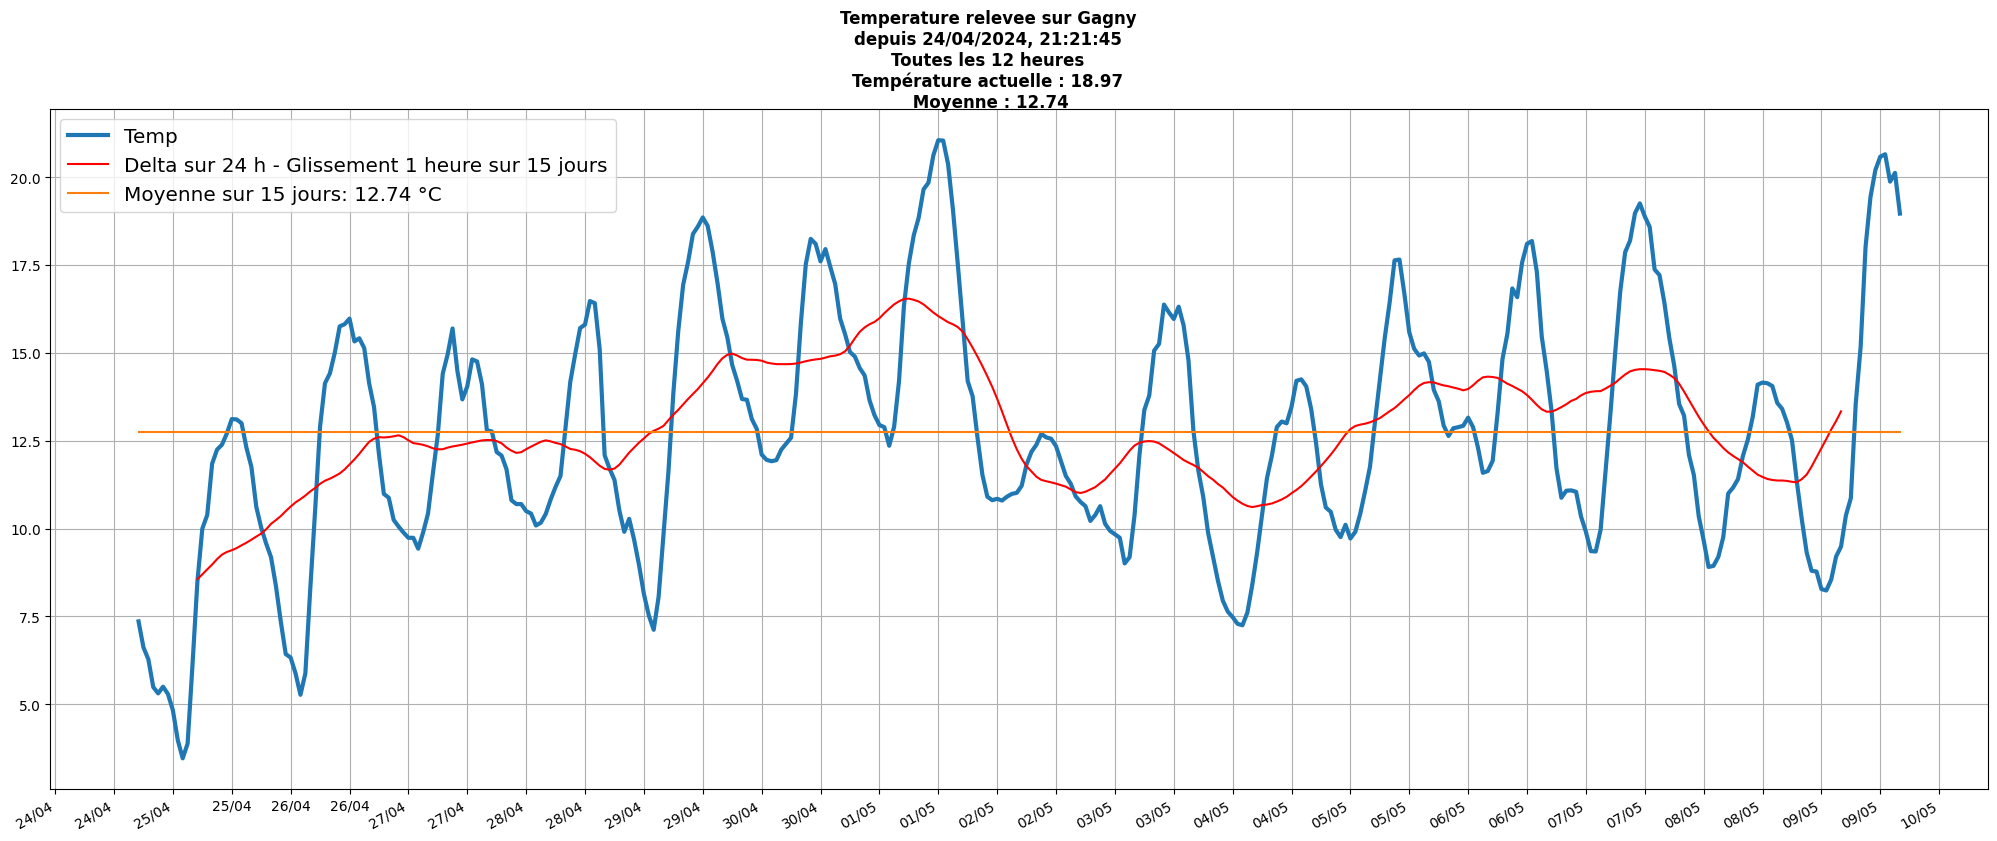

In [1229]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [1230]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
12247,16,20.59,0.38
12248,17,20.66,0.07
12249,18,19.88,-0.78
12250,19,20.13,0.25
12251,20,18.97,-1.16


In [1231]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,0.1)

0.05

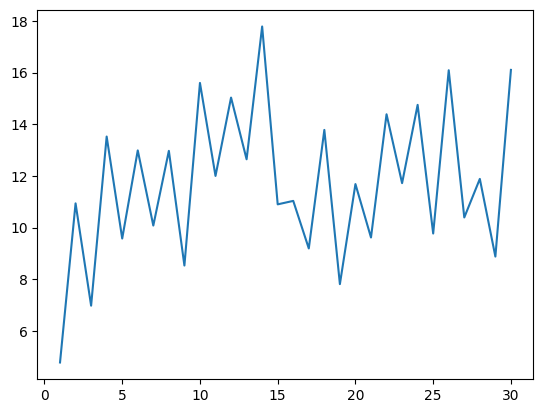

In [1232]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

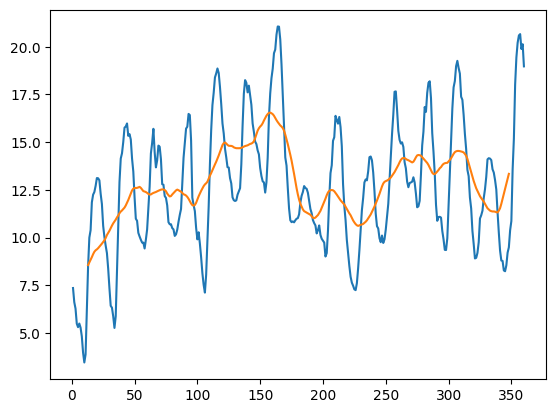

In [1233]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x244daf7e2d0>])

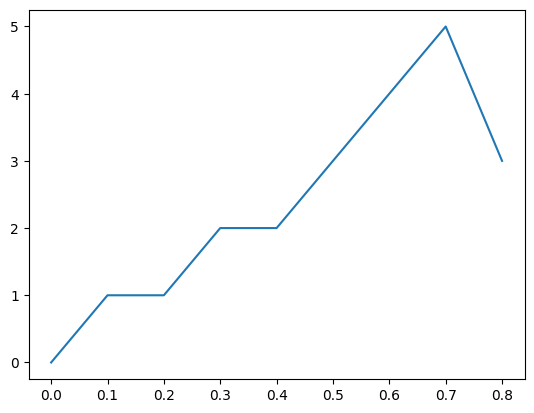

In [1234]:
df = [0,1,1,2,2,3,4,5,3]
dx = 0.1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x244dafedb80>])

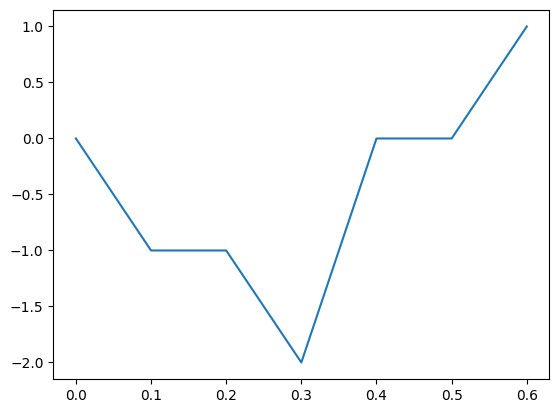

In [1235]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

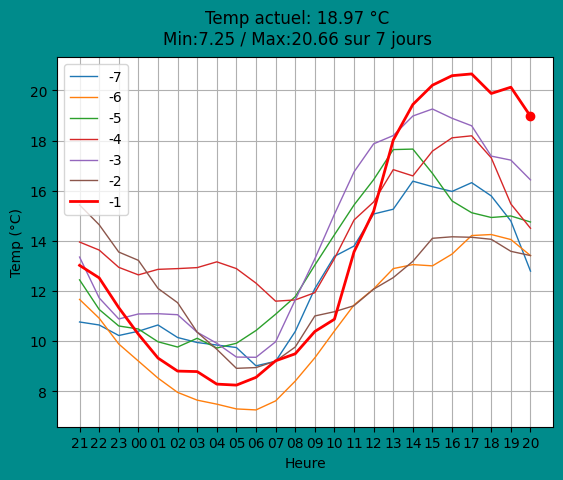

In [1236]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"Temp actuel: {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel("Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()

In [1237]:
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))

In [1238]:
max_,min_

(20.660000000000025, 8.240000000000009)

In [1239]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

# how to label on top of a bar plot

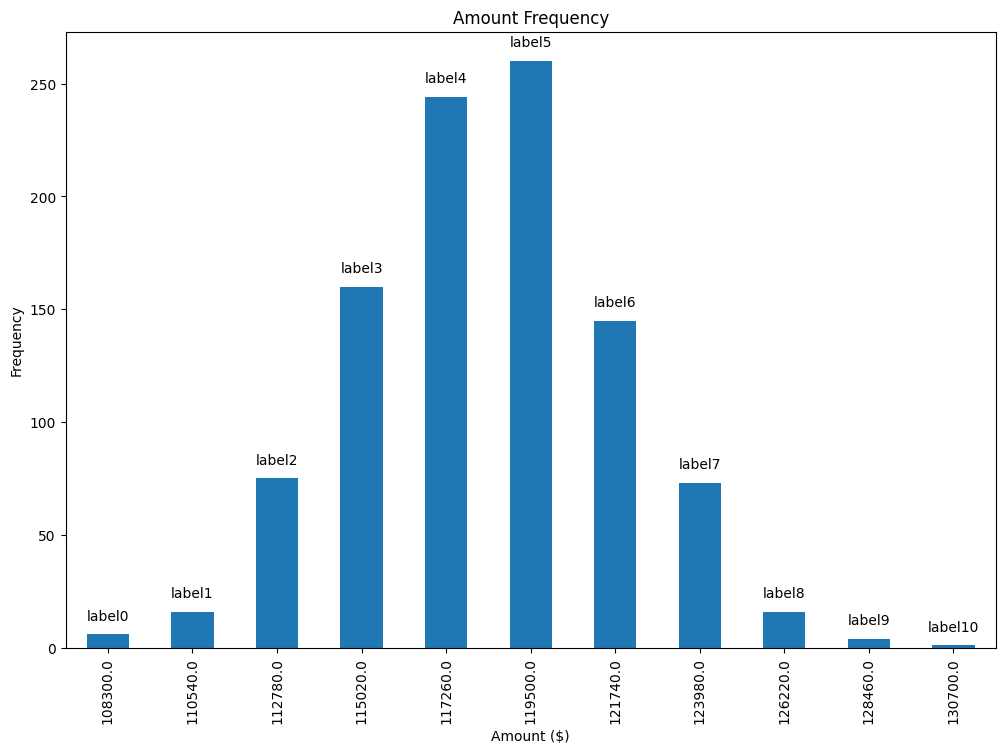

In [1240]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [1241]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25, [12.38, 10.73, 13.1, 14.33, 14.09, 12.34, 13.56])

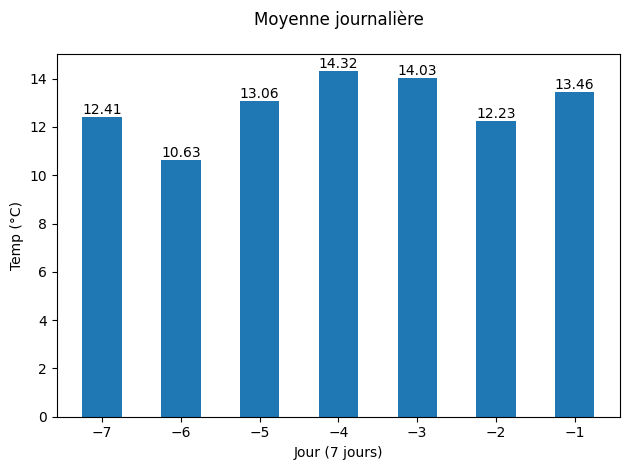

In [1242]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )



In [1243]:
labels

[12.41, 10.63, 13.06, 14.32, 14.03, 12.23, 13.46]

In [1244]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([13.02000000000004,
  12.52000000000004,
  11.33000000000004,
  10.27000000000004,
  9.32000000000005,
  8.800000000000011,
  8.78000000000003,
  8.28000000000003,
  8.240000000000009,
  8.550000000000011,
  9.210000000000036,
  9.490000000000007,
  10.379999999999995,
  10.870000000000005,
  13.560000000000002,
  15.180000000000009,
  18.02000000000004,
  19.44,
  20.21000000000004,
  20.590000000000032,
  20.660000000000025,
  19.879999999999995,
  20.129999999999995,
  18.970000000000027],
 309.7050000000005)

In [1245]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

309.7050000000005

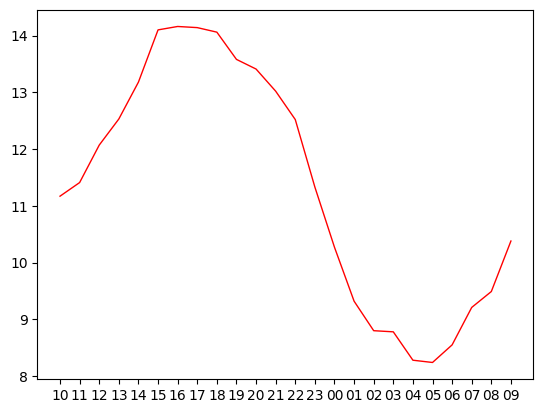

In [ ]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [ ]:
data.tail()


,temp,hours,dates,variation,heures
12236,8.24,19852.208333,09/05/24 05:00:00,-0.04,05
12237,8.55,19852.250000,09/05/24 06:00:00,0.31,06
12238,9.21,19852.291667,09/05/24 07:00:00,0.66,07
12239,9.49,19852.333333,09/05/24 08:00:00,0.28,08
12240,10.38,19852.375000,09/05/24 09:00:00,0.89,09


In [ ]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([14.160000000000023], [11.170000000000016, 8.240000000000009], 1, 2)

In [ ]:
_diff=[M-m for M,m in zip(_max, _min)]

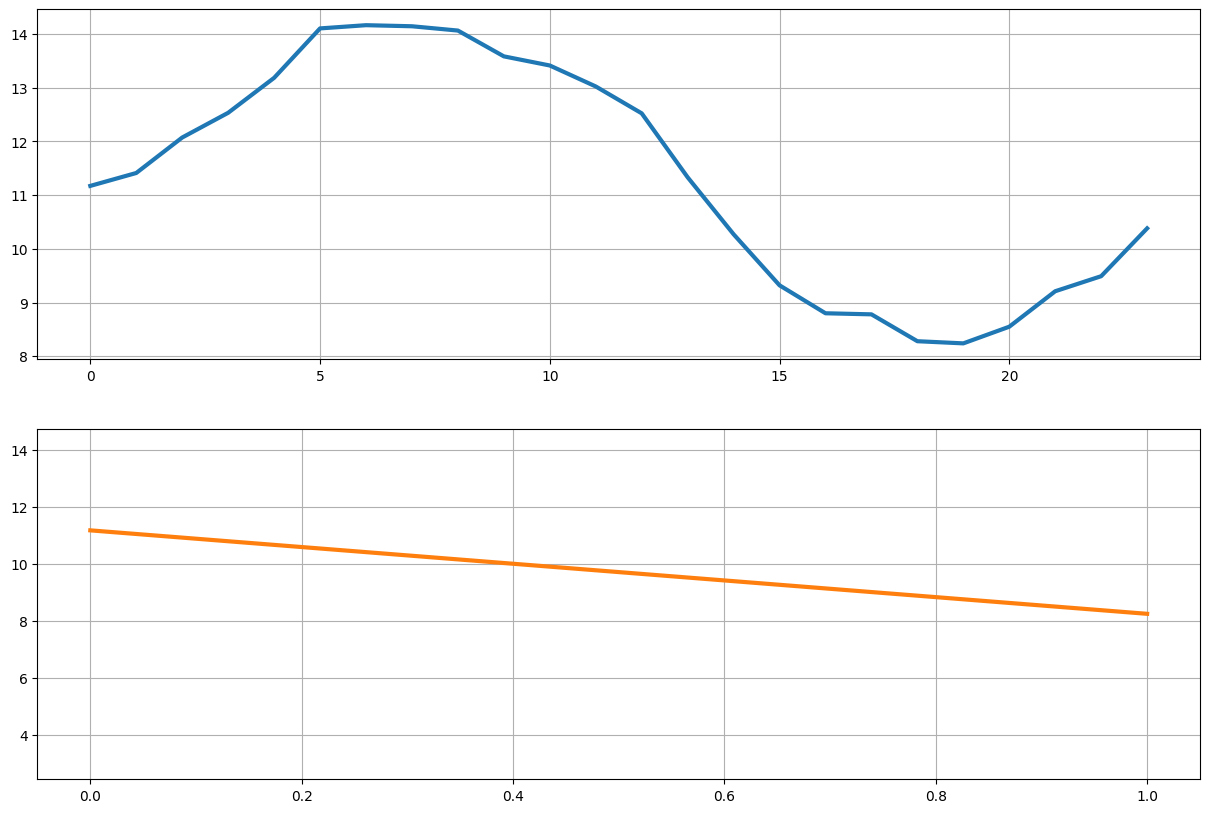

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[] 0 [] 0
[] 0 [] 0


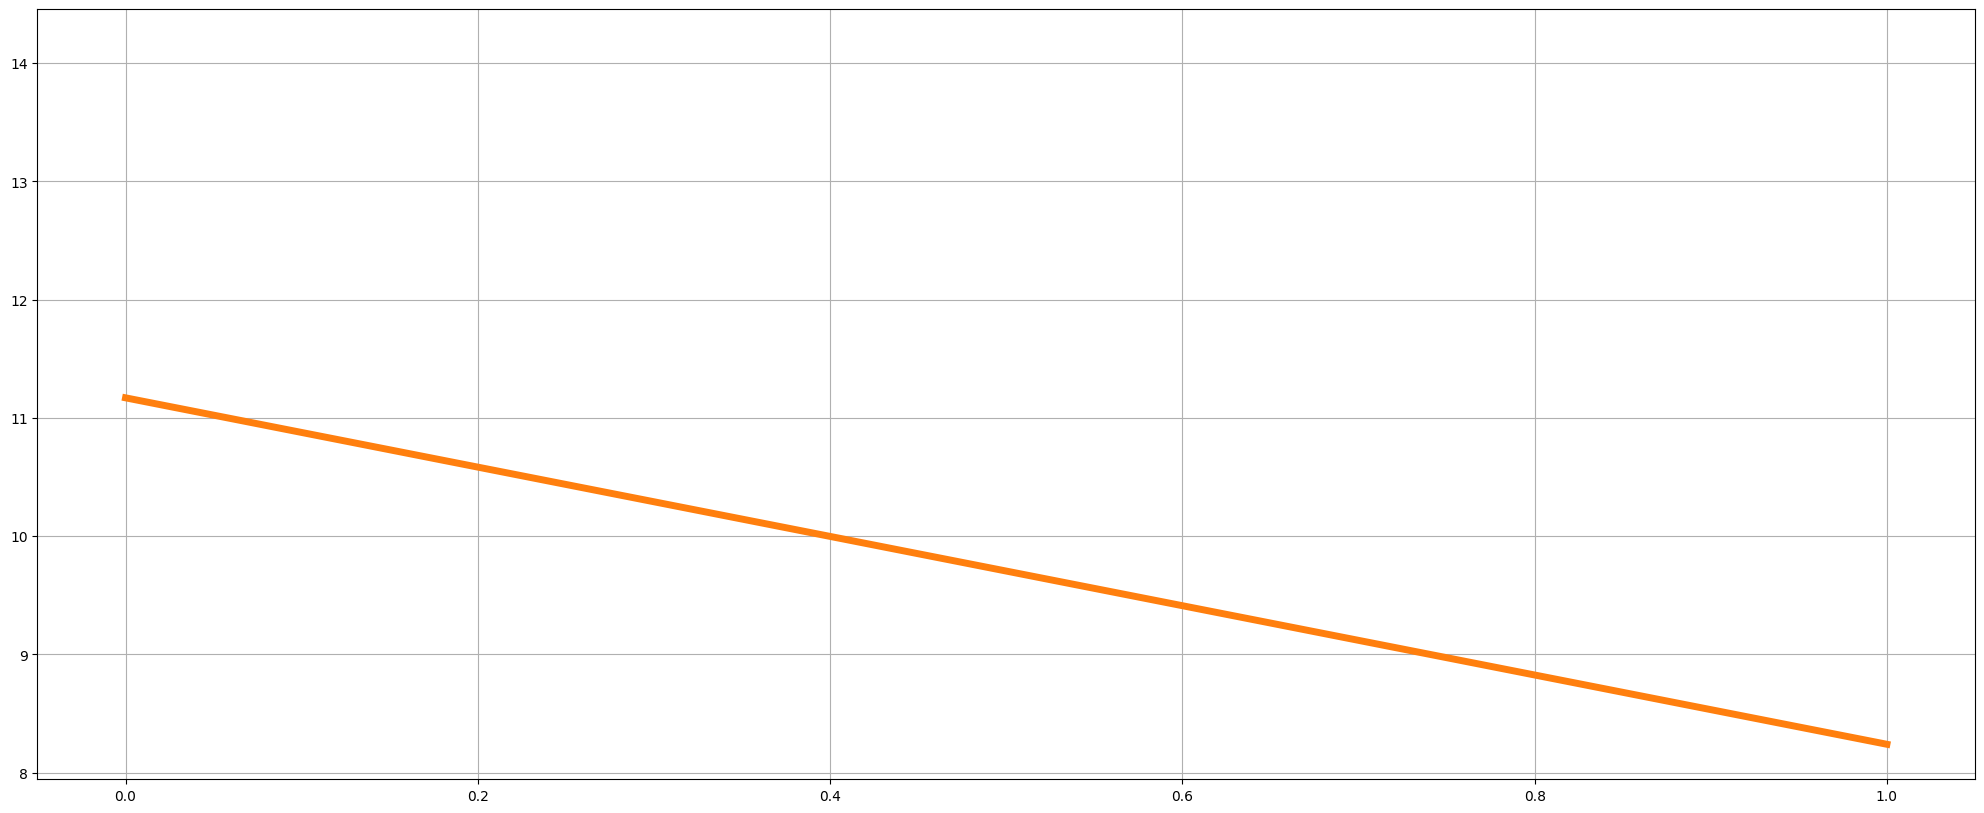

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [ ]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [ ]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [ ]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [ ]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [ ]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17], dtype=int64),)

[ 5 15] 2 [ 2 10 18] 3


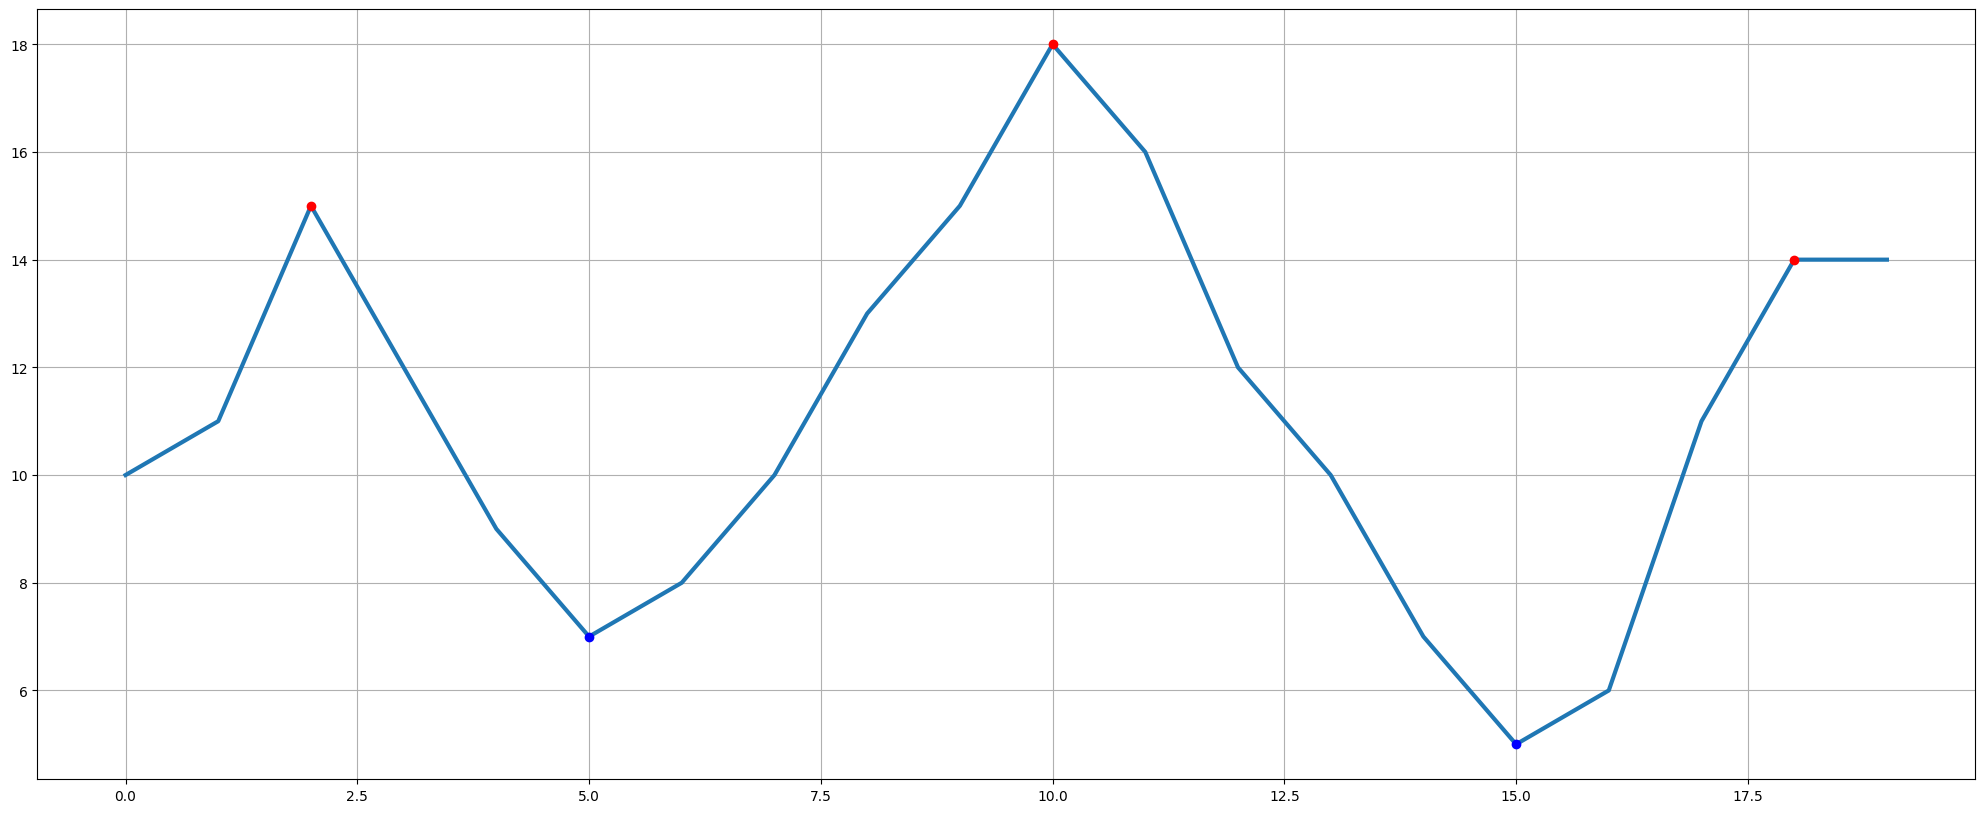

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [ ]:
date_time_str,days,interval

('16/12/22 9:00:00', 15, 12)

## last records

In [ ]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
12073,11.83,15.391667
12074,12.19,15.153333
12075,12.39,14.896667
12076,12.70,14.627500
12077,12.60,14.337500
...,...,...
12236,8.24,11.414167
12237,8.55,11.386250
12238,9.21,11.370000
12239,9.49,11.370417


<Axes: >

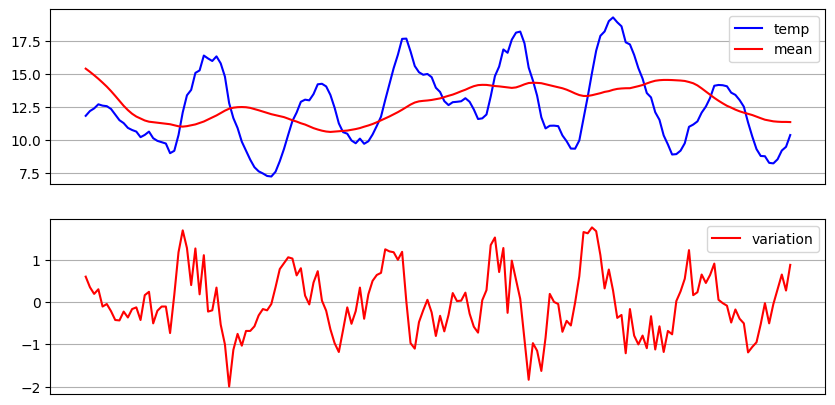

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [ ]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(19.260000000000048, 7.25)

In [ ]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [ ]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 12.47 4.86 7.61
J -28 16.83 10.86 5.97
J -27 18.58 11.09 7.49
J -26 23.64 12.2 11.44
J -25 25.88 10.44 15.44
J -24 20.19 8.07 12.12
J -23 13.59 6.7 6.89
J -22 13.21 4.84 8.37
J -21 12.11 3.82 8.29
J -20 12.81 6.72 6.09
J -19 11.76 3.43 8.33
J -18 9.95 3.01 6.94
J -17 11.24 2.89 8.35
J -16 10.85 1.74 9.11
J -15 12.15 6.34 5.81
J -14 10.19 3.46 6.73
J -13 13.12 5.27 7.85
J -12 15.98 9.43 6.55
J -11 15.7 10.09 5.61
J -10 16.48 7.12 9.36
J -9 18.86 11.92 6.94
J -8 18.25 12.36 5.89
J -7 21.06 10.8 10.26
J -6 12.7 9.01 3.69
J -5 16.38 7.25 9.13
J -4 14.25 9.72 4.53
J -3 17.66 11.59 6.07
J -2 18.19 9.35 8.84
J -1 19.26 8.91 10.35
J 0 14.16 8.24 5.92


<Axes: >

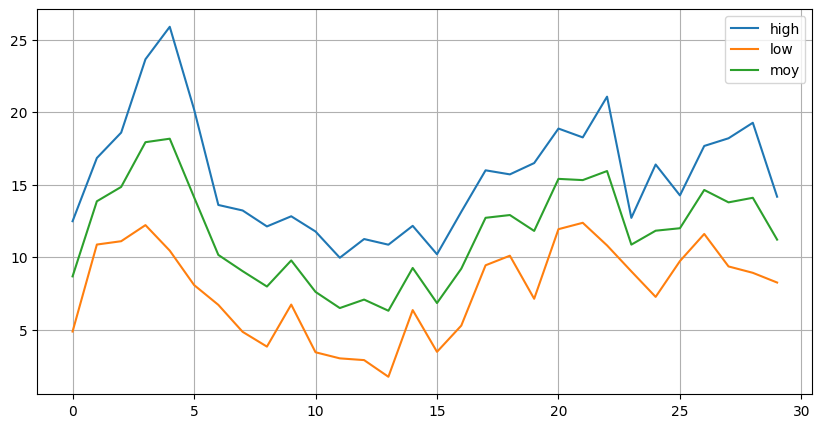

In [ ]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [ ]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[25.88, 12.81, 11.24, 12.15, 15.98, 18.86, 21.06, 16.38, 19.26]

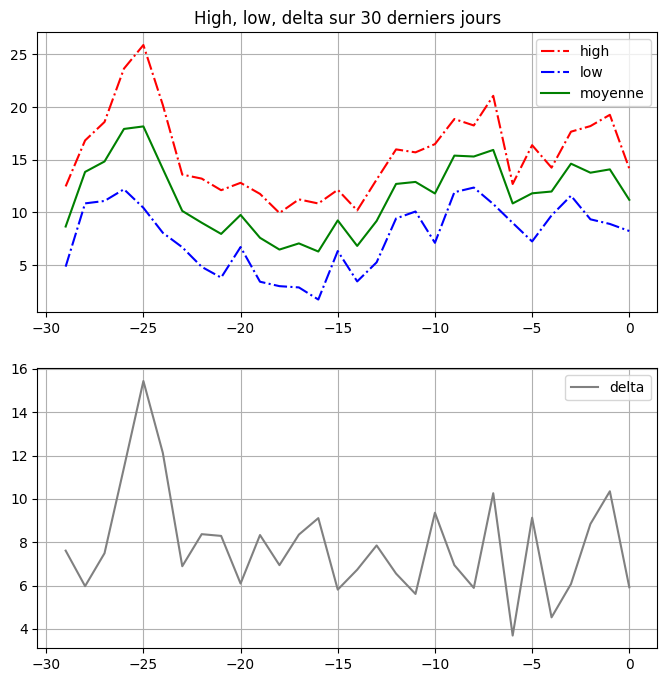

In [ ]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12241 entries, 0 to 12240
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       12241 non-null  float64
 1   hours      12241 non-null  float64
 2   dates      12241 non-null  object 
 3   variation  12240 non-null  float64
 4   heures     12241 non-null  object 
dtypes: float64(3), object(2)
memory usage: 478.3+ KB


In [ ]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [ ]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [ ]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

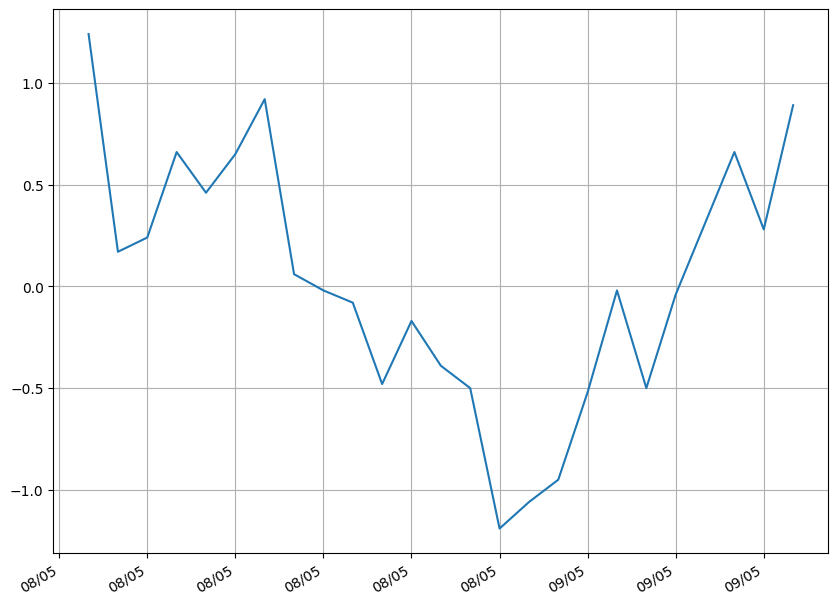

In [ ]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [ ]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, 21.06, 3.4600000000000364)

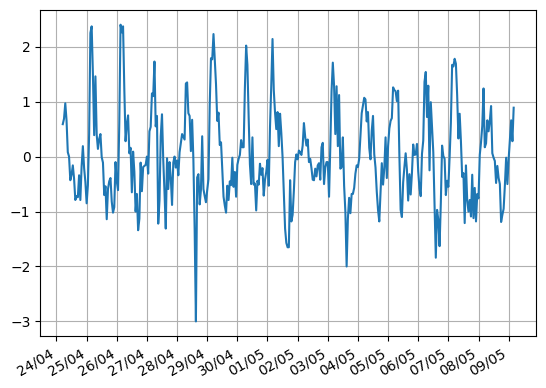

In [ ]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [ ]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(21.06,
 5029     13/07/23 22:00:00
 12055    01/05/24 16:00:00
 Name: dates, dtype: object)

In [ ]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(3.4600000000000364,
 852      20/01/23 21:00:00
 1026     28/01/23 03:00:00
 8338     28/11/23 19:00:00
 9286     07/01/24 07:00:00
 10170    13/02/24 03:00:00
 11901    25/04/24 06:00:00
 Name: dates, dtype: object)

In [ ]:
data.tail(w)['temp'].describe()

count    360.000000
mean      12.472889
std        3.331211
min        3.460000
25%       10.190000
50%       12.305000
75%       14.767500
max       21.060000
Name: temp, dtype: float64

In [ ]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('09/05/24 10:55:37', 10.38)

In [ ]:
# current date and time
ts = datetime.timestamp(today)
ts

1715244937.111901